# Bike Share Service Data Exploration

## Preliminary Wrangling

## Information Regarding the Dataset
This dataset holds trip information made by members of __Ford GoBike__'s bike share service during February in 2019 

__Columns__:
- `duration_sec`: represents the time (in seconds) for the trip was ongoing
- `start_time`: represents the date and time when the trip started in the format (YYYY-MM-DD HH:MM:SS)
- `end_time`: represents the date and time when the trip ended in the format (YYYY-MM-DD HH:MM:SS)
- `start_station_id`: holds the id of the station where the trip started
- `start_station_name`: holds the name of the station where the trip started
- `start_station_latitude`: represents the angle from the equator to the start station's location 
- `start_station_longitude`: represents the angle from the prime meridian to the start station's location
- `end_station_id`: holds the id of the station where the trip ended
- `end_station_name`: holds the name of the station where the trip ended
- `end_station_latitude`: represents the angle from the equator to the end station's location  
- `end_station_longitude`: represents the angle from the prime meridian to the end station's location 
- `bike_id`: represents the id of the bike involved in the trip
- `member_birth_year`: holds the birth year of the user
- `member_gender`: contains the gender of the user; either male or female
- `bike_share_for_all_trip`: represents whether members are enrolled in the [Bike Share For All](https://www.motivateco.com/ford-gobike-bike-share-system-passes-growth-milestones/#:~:text=Members%20enrolled%20in%20Ford%20GoBike,rides%20on%20any%20Ford%20GoBike.) discount program

## Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Gather

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Assess

In [3]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [4]:
df.shape

(183412, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# birth year is important to derive the age of service users
df.member_birth_year.isnull().sum()

8265

In [7]:
df.member_birth_year.isnull().sum() / df.shape[0]

0.04506248228033062

In [8]:
df[df.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [9]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
df.bike_id.value_counts()

4794    191
4814    176
5014    174
4422    174
5175    173
       ... 
5647      1
3655      1
1194      1
3114      1
5891      1
Name: bike_id, Length: 4646, dtype: int64

In [11]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [12]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

### Quality Issues:
- Missing values in the `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year` and `member_gender`.
- `start_time` and `end_time` columns represented as strings
- `start_station_id` and `end_station_id` columns represented as floating point numeric types
- `bike_id` represented as an integer type
- `member_birth_year` represented as a floating point numeric type
- Outlier(s): maximum trip duration is around 23.73 hours (85444 seconds)
- Outlier(s): minimum member birth year is 1878. Compared to 2019 member should be about 141 years old
- `bike_share_for_all_trip` type could be changed to boolean or category

## Cleaning

In [13]:
# make copy of dataframe object to start the cleaning process
df_clean = df.copy()

_Missing values in the `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year` and `member_gender`._
### Define
- drop all rows with missing values

In [14]:
df_clean.dropna(axis=0, inplace=True)

### Test

In [15]:
df_clean.isnull().sum().sum()

0

_start_time and end_time columns represented as strings_

### Define
- use pd.to_datetime to convert the column type as required

In [16]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

### Test

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

_start_station_id and end_station_id columns represented as floating point numeric types_

### Define
- use astype to convert the types of the specified columns to string

In [18]:
df_clean.start_station_id = df_clean.start_station_id.astype('object')
df_clean.end_station_id = df_clean.end_station_id.astype('object')

### Test

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

_bike_id represented as an integer type_

### Define
- use astype to convert the types of the specified column to string

In [20]:
df_clean.bike_id = df_clean.bike_id.astype('object')

### Test

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

_member_birth_year represented as a floating point numeric type_

### Define
- use astype to convert the type of the specified column to int

In [22]:
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

### Test

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

_Outlier(s): maximum trip duration is around 23.73 hours (85444 seconds)_

### Define
- Remove outliers

In [24]:
# first use boxplot threshold
duration_q1 = df_clean.duration_sec.quantile(.25)
duration_q3 = df_clean.duration_sec.quantile(.75)
duration_iqr = duration_q3 - duration_q1
threshold = (1.5 * duration_iqr) + duration_q3
threshold

1488.0

In [25]:
duration_outliers = df_clean.query('duration_sec > 1488')
duration_outliers

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183017,1589,2019-02-01 07:01:40.195,2019-02-01 07:28:10.051,58,Market St at 10th St,37.776619,-122.417385,145,29th St at Church St,37.743684,-122.426806,5051,Subscriber,1967,Male,Yes
183060,1616,2019-02-01 06:54:49.040,2019-02-01 07:21:45.657,85,Church St at Duboce Ave,37.770083,-122.429156,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5404,Subscriber,1964,Other,Yes
183165,2870,2019-02-01 06:07:09.568,2019-02-01 06:54:59.714,304,Jackson St at 5th St,37.348759,-121.894798,292,Empire St at 1st St,37.344882,-121.896966,3916,Subscriber,1957,Male,Yes
183326,5713,2019-02-01 01:02:55.168,2019-02-01 02:38:09.002,31,Raymond Kimbell Playground,37.783813,-122.434559,31,Raymond Kimbell Playground,37.783813,-122.434559,5366,Subscriber,1972,Male,No


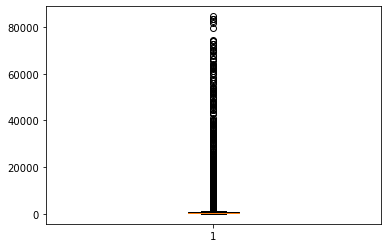

In [26]:
# visualize distribution of duration_sec
plt.boxplot(df_clean.duration_sec);

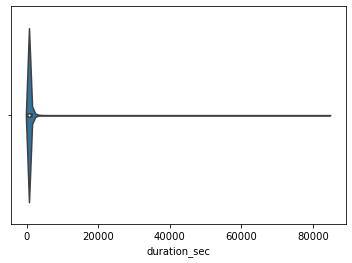

In [27]:
sns.violinplot(x=df_clean.duration_sec);

> The presence of outliers distorts the data significantly, thus outliers must be removed

In [28]:
df_clean.drop(index=duration_outliers.index, inplace=True)

### Test

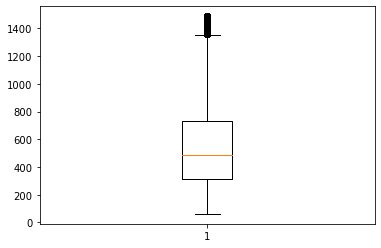

In [29]:
plt.boxplot(df_clean.duration_sec);

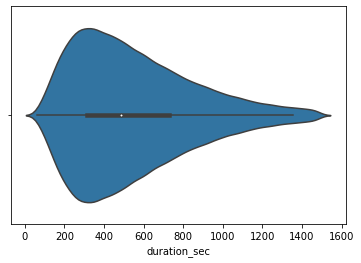

In [30]:
sns.violinplot(x=df_clean.duration_sec);

In [31]:
df_clean.duration_sec.describe()

count    165624.000000
mean        550.205840
std         304.287686
min          61.000000
25%         314.000000
50%         488.000000
75%         731.000000
max        1488.000000
Name: duration_sec, dtype: float64

_Outlier(s): minimum member birth year is 1878. Compared to 2019 member should be about 141 years old_

### Define
- remove outliers according to [oldest person alive world record](https://www.guinnessworldrecords.com/news/2020/5/worlds-oldest-man-bob-weighton-dies-aged-112#:~:text=The%20oldest%20person%20ever%20to,Kane%20Tanaka%20(Japan%2C%20b..)

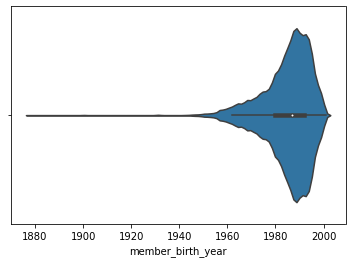

In [32]:
# visualize year distribution
sns.violinplot(x=df_clean.member_birth_year);

In [33]:
outliers = df_clean.query('member_birth_year < 1900')
outliers

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878,Female,No


In [34]:
df_clean.drop(index=outliers.index, inplace=True)

### Test

In [35]:
df_clean.query('member_birth_year < 1900')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


_bike_share_for_all_trip type could be changed to boolean or category_

### Define
- use astype to convert type of specified column to category

In [36]:
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

### Test

In [37]:
df_clean.bike_share_for_all_trip

6          No
9          No
10        Yes
11         No
12         No
         ... 
183407     No
183408     No
183409    Yes
183410     No
183411     No
Name: bike_share_for_all_trip, Length: 165623, dtype: category
Categories (2, object): ['No', 'Yes']

### What is/are the main feature(s) of interest in the dataset?

- `duration_sec`; this seems to be the most important variable in terms of its correlation with other variables and how it is influenced by them.

### What features in the dataset will help support investigation into the feature(s) of interest?

- `member_age` derived
- `weekday` derived
- `member_birth_year`
- `member_gender`
- `bike_share_for_all_trip`

## Univariate Exploration

In [38]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip          category
dtype: object

#### What is the distribution of the `duration_sec` column?
> The duration distribution for all trip is significantly skewed to the right with a mode around 5000 seconds

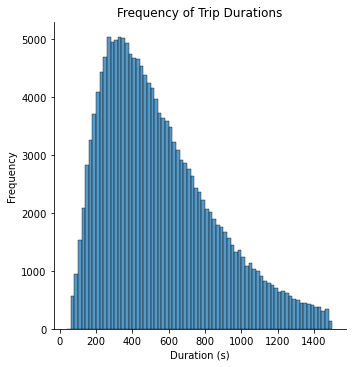

In [39]:
base_color = sns.color_palette()[0]
bins = np.arange(df_clean.duration_sec.min()-20, df_clean.duration_sec.max()+20, 20)
sns.displot(df_clean.duration_sec, bins=bins, color=base_color);
plt.title("Frequency of Trip Durations");
plt.xlabel("Duration (s)");
plt.ylabel("Frequency");

#### What is the count members who took part in the bike share for all program?

> By looking at the bar chart it seems that interest in the discount program is very low.

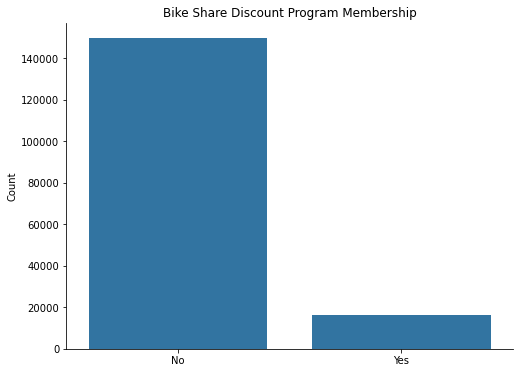

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_clean, x='bike_share_for_all_trip', color=base_color);
sns.despine();
plt.title("Bike Share Discount Program Membership");
plt.ylabel("Count");
plt.xlabel("");

#### How does the proportion of male members compare to the proportion of female members

> The number of users who were reluctant to reveal their their gender were only 2%. Meanwhile, the higher portion of users were male.

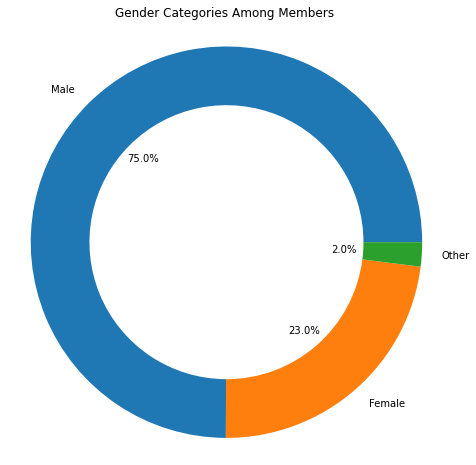

In [41]:
plt.figure(figsize=(8, 8))
counts = df_clean.member_gender.value_counts()
plt.pie(counts, labels=counts.index, wedgeprops={'width':0.3}, autopct='%1.1f%%');
plt.axis('square');
plt.title("Gender Categories Among Members");

#### What was the age distribution of users in 2019?
> The age distribution is highly skewed to the right, however it shows a clear modal age range in the 30s.

In [42]:
df_clean['age'] = 2019 - df_clean.member_birth_year

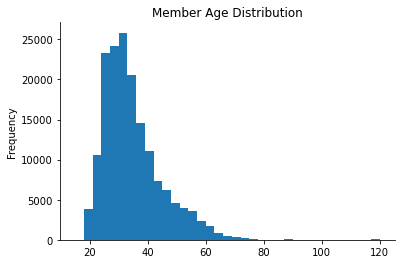

In [43]:
bins = np.arange(df_clean.age.min()-3, df_clean.age.max()+3, 3)
plt.hist(data=df_clean, x='age', bins=bins, color=base_color);
sns.despine();
plt.title("Member Age Distribution");
plt.ylabel("Frequency");

#### Which day of the week is most popular for bike trips?
> Although some bike trips continue into the next day, the most popular day for bike trips appears to be Thursday. A peculiar trend can also be seen with the similar counts for Saturday and Sunday; this could probably be attributed to the fact that this pair of days is a vacation for a lot of people in the studied geographic area.

In [44]:
dummy = df_clean.copy()
dummy = dummy.set_index('start_time')
dummy['weekday'] = dummy.index.day_name()
dummy.head()

,duration_sec,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,weekday
start_time,,,,,,,,,,,,,,,,,
2019-02-28 23:55:35.104,1147,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,36,Thursday
2019-02-28 23:49:47.699,1049,2019-03-01 00:07:17.025,19,Post St at Kearny St,37.788975,-122.403452,121,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,27,Thursday
2019-02-28 23:57:57.211,458,2019-03-01 00:05:35.435,370,Jones St at Post St,37.787327,-122.413278,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes,23,Thursday
2019-02-28 23:56:55.540,506,2019-03-01 00:05:21.733,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343,Bryant St at 2nd St,37.783172,-122.393572,5848,Subscriber,1993,Male,No,26,Thursday
2019-02-28 23:45:12.651,1176,2019-03-01 00:04:49.184,127,Valencia St at 21st St,37.756708,-122.421025,323,Broadway at Kearny,37.798014,-122.405950,5328,Customer,1990,Male,No,29,Thursday


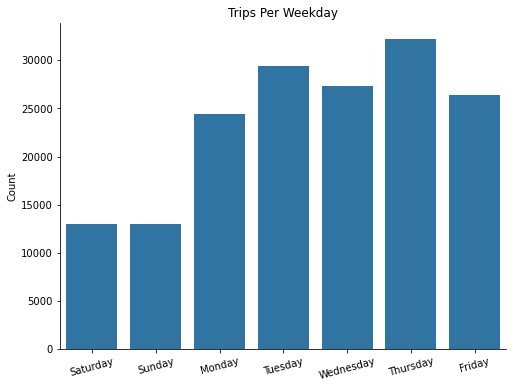

In [45]:
order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
day_classes = pd.api.types.CategoricalDtype(ordered=True, categories=order)
dummy.weekday = dummy.weekday.astype(day_classes)
plt.figure(figsize=(8, 6))
sns.countplot(data=dummy, x='weekday', color=base_color);
plt.xticks(rotation=15);
sns.despine();
plt.title("Trips Per Weekday");
plt.ylabel("Count");
plt.xlabel("");

## Bivariate Exploration

In [46]:
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age'],
      dtype='object')

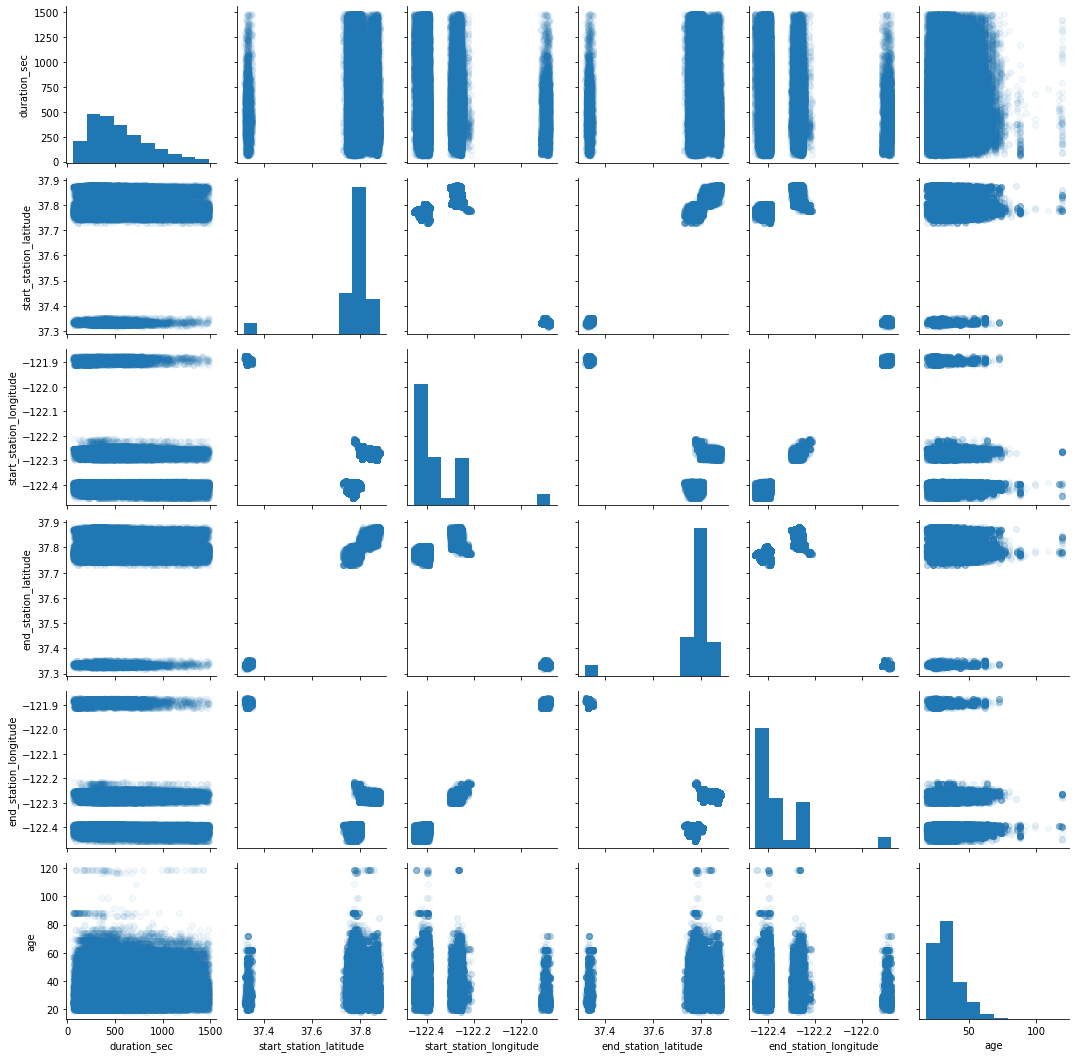

In [47]:
cols = ['duration_sec', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'age']

g = sns.PairGrid(data=df_clean, vars=cols)
g = g.map_offdiag(plt.scatter, alpha=1/20)
g.map_diag(plt.hist);

> By looking at the scatter plots of numeric variables in the dataset, it is evident that there are very few linear relationships. However, it is evident that as the age of the users increase their ability to complete long trips suddenly decreases.

#### How does age affect the trip duration?
> It seems as though there are some outliers with trip durations of less than 10 seconds; these however do not need to be removed as they do not affect the trends in the data. By comparing both heatmaps below we can see that the cyclers with the highest trip duration are either in their late twenties or in their early thirties. This corroborates our previous finding from looking at the scatter graphs.

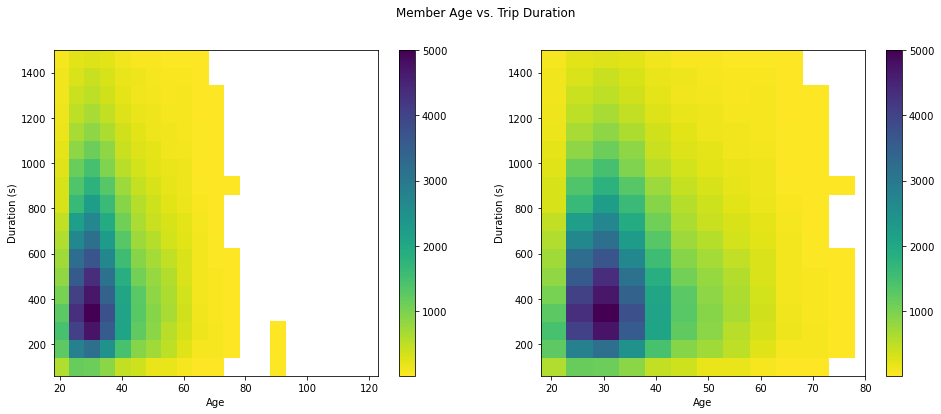

In [48]:
bins_x = np.arange(df_clean['age'].min(), df_clean['age'].max() + 5, 5)
bins_y = np.arange(df_clean['duration_sec'].min(), df_clean['duration_sec'].max() + 80, 80)
plt.figure(figsize=(16,6))
plt.suptitle("Member Age vs. Trip Duration");
plt.subplot(1,2,1);
plt.hist2d(data=df_clean, x='age', y='duration_sec', cmap='viridis_r', cmin=10, bins=[bins_x, bins_y]);
plt.colorbar();
plt.xlabel("Age");
plt.ylabel("Duration (s)");
plt.subplot(1,2,2);
plt.hist2d(data=df_clean, x='age', y='duration_sec', cmap='viridis_r', cmin=10, bins=[bins_x, bins_y]);
plt.colorbar();
plt.xlabel("Age");
plt.ylabel("Duration (s)");
plt.xlim(18,80);

#### To what extent does the gender of members influence the duration of their trips?
> The histograms for each gender type and trip duration show that on average more males than females or members belonging to the other category went on bicycle rides for all duration ranges. This insight may have been inaccurate if we assumed that all the data points belonging to the 'other' category belonged to female members who did not want to disclose their gender, but by imagining the combination of the 'female' and 'other' categories we could see that the 'male' category would still retain the upper hand with respect to the frequency of the trip duration variable. Finally, in all categories, we can see the histograms are skewed to the right which could be an indication that very few cyclers are capable of completing longer than average trips.

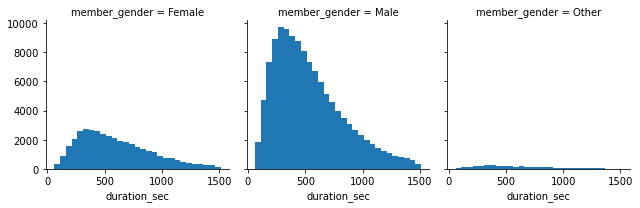

In [49]:
bins = np.arange(df_clean.duration_sec.min(), df_clean.duration_sec.max()+50, 50)
g = sns.FacetGrid(data=df_clean, col='member_gender');
g.map(plt.hist, 'duration_sec', bins=bins);

#### What is the relationship between membership in the bike share for all discount program and gender of members?
> As we previously noted, the interest in the discount program is not significant across gender categories, althought members may save some money by joining this program.

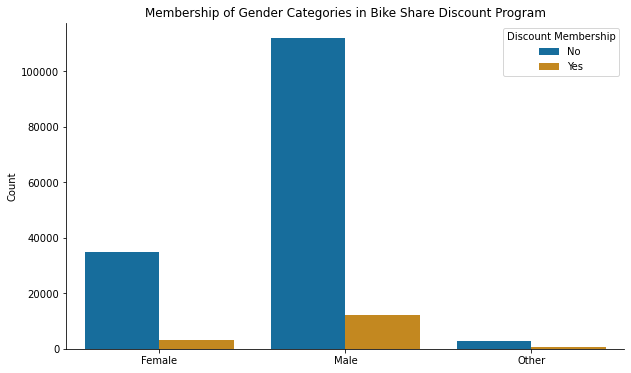

In [50]:
plt.figure(figsize=(10,6));
ax = sns.countplot(data=df_clean, hue='bike_share_for_all_trip', x='member_gender', palette='colorblind');
ax.legend(title="Discount Membership");
sns.despine();
plt.title("Membership of Gender Categories in Bike Share Discount Program");
plt.xlabel("");
plt.ylabel("Count");

#### Does the weekday play an important role in varying the trip duration?
> As is evident from the below boxplots we can see that the day of the week signifies that bicycle traffic is lowest on Monday, Tuesday, and Wednesday. On the other hand, it is highest on Saturday and Sunday.

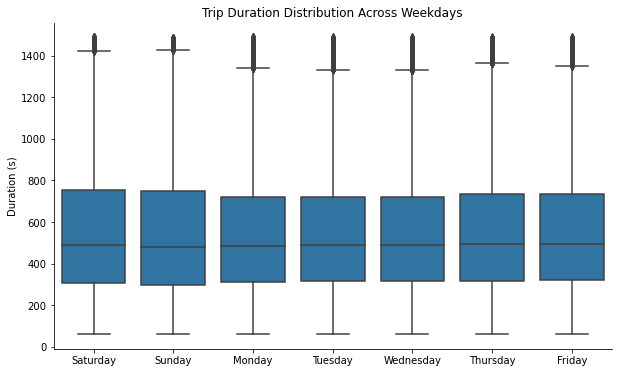

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(data=dummy, x='weekday', y='duration_sec', color=base_color);
sns.despine();
plt.title("Trip Duration Distribution Across Weekdays");
plt.xlabel("");
plt.ylabel("Duration (s)");

## Multivariate Exploration

#### How is the trip duration affected by both the gender and the membership in the bike share for all dicount program?
> Although the male members seemed to be the most interested group in bicycle rides, this visualization shows that on average they scored the least trip duration out of the 3 gender categories. It is also worth noting that this plot shows for the third time that the discount program is not a motive for marketing the bike business and/or increasing the average trip duration.

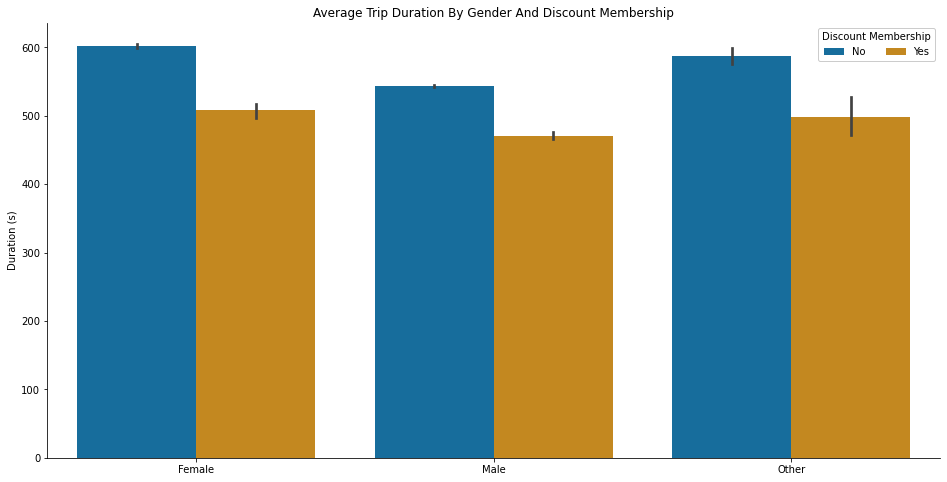

In [52]:
plt.figure(figsize=(16,8))
ax = sns.barplot(data=df_clean, x='member_gender', y='duration_sec', hue='bike_share_for_all_trip', palette='colorblind');
ax.legend(ncol=3, framealpha=1, title="Discount Membership");
sns.despine();
plt.title("Average Trip Duration By Gender And Discount Membership");
plt.xlabel("");
plt.ylabel("Duration (s)");

## Summary

- As expected, the distribution of trip durations is highly skewed to the right which shows that as the trip gets longer and becomes more demanding the lower the chances of it occurring.
- The age distribution of members also shows a skewness to the right which is another normal aspect of the nature of bike riding; not many old people would tolerate physically taxing rides. The modal age range with the highest trip duartions is centered around 30 years old.
- A further real-life note to be picked up from the visualizations is that the number of trips on weekends is very similar and that the trip duration peaks on weekends.
- Surprisingly, however, the majority of members were not interested in obtaining ride discounts which is shown by the low membership rates in the bike share for all discount program. This discount program did not even affect the duration of trips as shown by the `Average Trip Duration By Gender And Discount Membership` visualization; the members who took part in the discount program always had lower average trip durations.